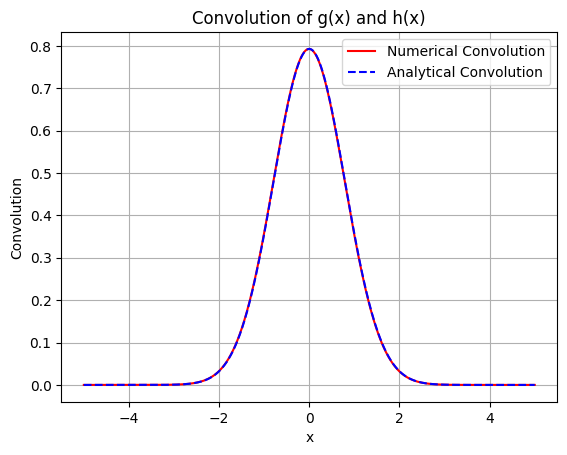

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the g(x) and h(x) function
def g(x):
    return np.exp(- x**2)

def h(x):
    return np.exp(- 4 * x**2)


# Define the convolution function
def convolution(g, h, dx, n):

    # Pad the functions with zeros to avoid boundary issues
    g_padded = np.pad(g, (0, len(h)), mode='constant')
    h_padded = np.pad(h, (0, len(g)), mode='constant')

    # Compute convolution using FFT
    g_dft = np.fft.fft(g_padded, norm = 'ortho')
    h_dft = np.fft.fft(h_padded, norm = 'ortho')

    multiplied_dft = g_dft * h_dft 

    convolution_result = np.fft.ifft(multiplied_dft, norm = 'ortho').real

    # Scale by dx * Sqrt(2n)
    return convolution_result * dx * np.sqrt(2*n)


# Define the x range and step
xmin = -5
xmax = 5
n = 1024
xarr = np.linspace(xmin, xmax, n)
dx = xarr[1] - xarr[0]

# Compute the box function
garr = g(xarr)
harr = h(xarr)

# Compute the convolution of the box function with itself
convolution_result = convolution(garr, harr, dx, n)

convo_result = convolution_result[int(n/2):int(-n/2)]

# analytical convolution
def convo_analytical(x):
    return np.sqrt(np.pi/5) * np.exp(- (4 * x**2)/5)

analytical_result = convo_analytical(xarr)

# Plot the convolution result
plt.plot(xarr, convo_result[:len(xarr)], label='Numerical Convolution', color = 'r')
plt.plot(xarr, analytical_result, label = 'Analytical Convolution', color ='b', linestyle = '--')
plt.xlabel('x')
plt.ylabel('Convolution')
plt.title('Convolution of g(x) and h(x)')
plt.legend()
plt.grid(True)
plt.show()